![](http://)<img width="200" align="left" src="https://www.ehu.eus/documents/1294053/6902569/Escuela+Ingenieria_Gipuzkoa_ingles_positivo_baja.jpg">

# Python exercises for Industrial IT students

Here we have some exercises for Industrial IT course students. More info:

![](http://)https://informatics.industriainformatika.pw/2020/06/python-jupyter-kaggle.html

The next block loads the basics, so please do not change it if you are not completely sure of what you want to do.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import datetime
import matplotlib.dates as mdates
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# The present example uses the following data set and it is based on the more complex notebook developed for that dataset.
# https://www.kaggle.com/manualrg/spanish-electricity-market-demand-gen-price
#
# https://www.kaggle.com/manualrg/daily-electricity-demand-forecast-machine-learning

path = "/kaggle/input/spanish-electricity-market-demand-gen-price/spain_energy_market.csv"
data = pd.read_csv(path, sep=",", parse_dates=["datetime"])
data = data[data["name"]=="Demanda programada PBF total"]#.set_index("datetime")
data["date"] = data["datetime"].dt.date
data.set_index("date", inplace=True)
data = data[["value"]]
data = data.asfreq("D")
data = data.rename(columns={"value": "energy"})
data.info()

Once we load the data we want to plot into the variable named "data", we can display the first six rows. What do you have to do to display the last six rows?

In [ ]:
data[0:6]


The result should look like this:

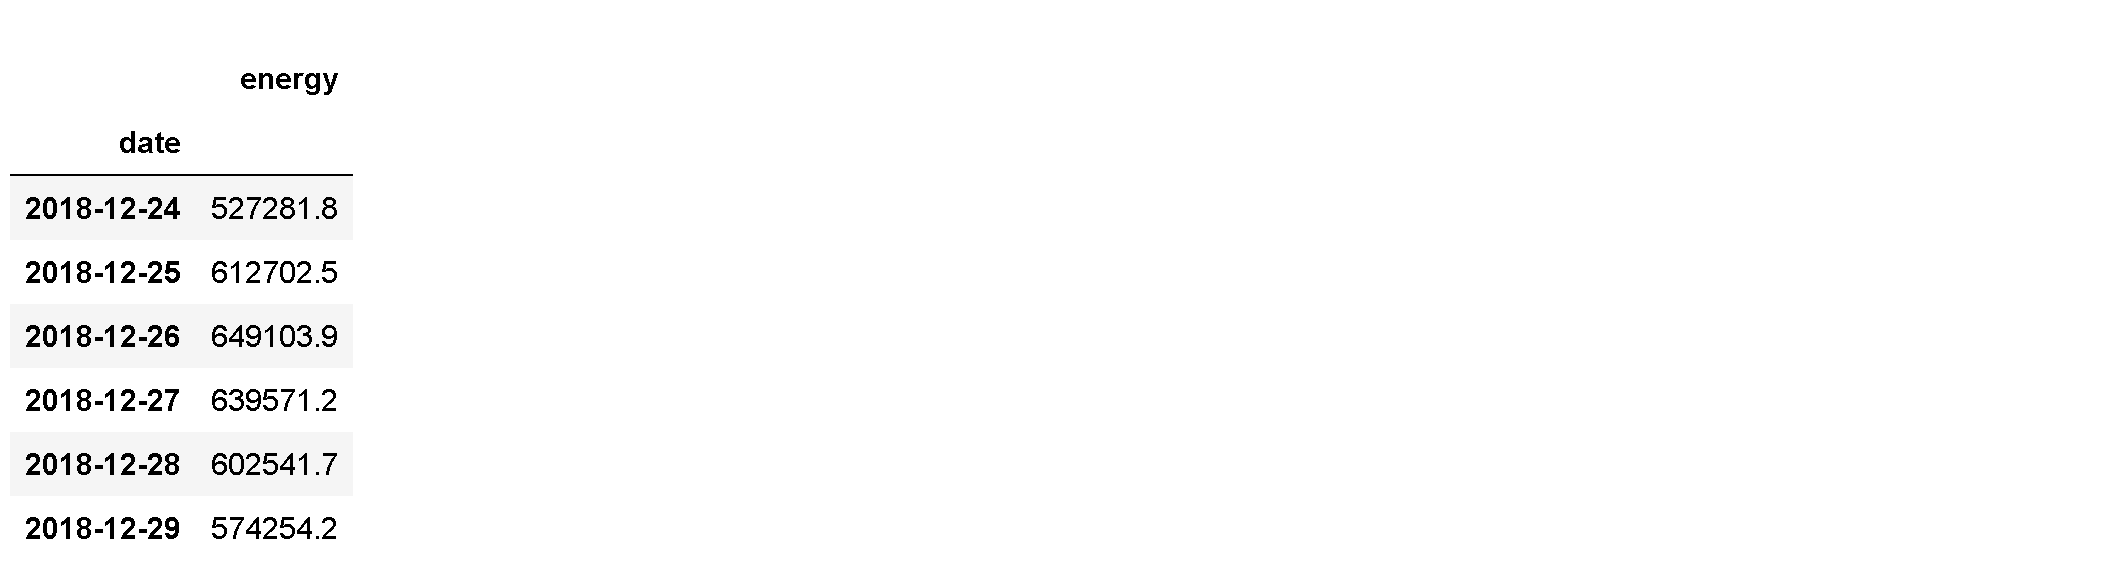

After that, we would like to plot the Energy Demand on a graph. Can you plot "data" using the .plot method? Can you add a title and the y axis label like in the figure below?

Hint: the pyplot library has been renamed as plt, so it is posible to write plt.xlabel("X"), for example.

In [ ]:
# write your code here
fig, ax = plt.subplots()
plt.plot(data)
# call the plot method on data and put the title
plt.title('Energy Demand')
# change the y label
plt.ylabel('MWh')
plt.xlabel('date')
# show the plot
plt.legend(['energy'],loc=2)
plt.xlim(datetime.date(2014,1,1),datetime.date(2018,12,31))
myFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.show()

The graph should be similar to the following picture:

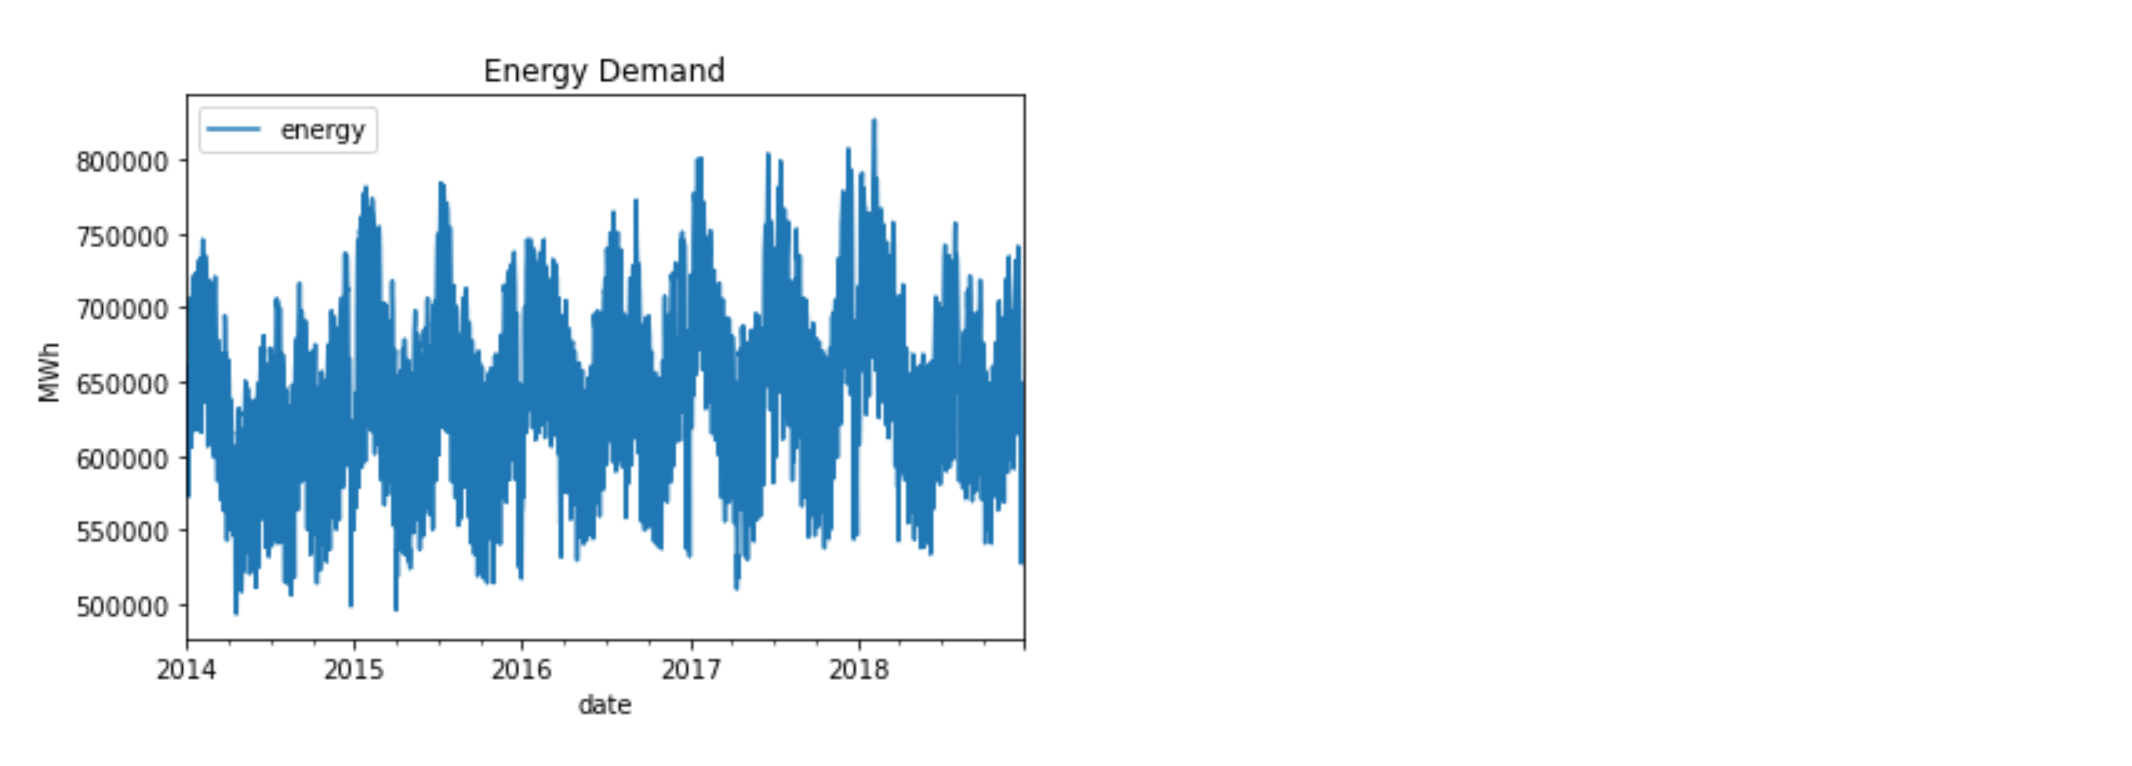

In [ ]:
# Further practice here
mvgavg = data.energy
window = 30
i = 0

moving_averages = []
while i < len(mvgavg) - window + 1:
    this_window = mvgavg[i : i + window]
    window_average = sum(this_window) / window
    moving_averages.append(window_average)
    i += 1

fig, ax = plt.subplots()
plt.plot(moving_averages)